In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#pd.options.display.max_rows = 6000
#pd.options.display.max_columns = 6000

In [4]:
#data1 = pd.read_csv("./Data/tn.movie_budgets.csv.gz")
#data1.info()
title_basics = pd.read_csv('./Data/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv("./Data/imdb.title.ratings.csv.gz")
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv.gz')

In [5]:
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
imdb_data = imdb_data.drop(columns='runtime_minutes')

In [7]:
imdb_data = imdb_data.dropna(subset=['genres'])

In [8]:
imdb_data = imdb_data.rename(columns={'primary_title': 'movie'})

In [9]:
mdf = pd.merge(imdb_data, movie_budgets, on=['movie'], how='inner')

In [10]:
mdf = mdf.drop_duplicates(subset=['movie'])

In [11]:
mdf2 = mdf.copy()
mdf2['production_budget'] = mdf2['production_budget'].map(lambda x: x.lstrip('$'))
mdf2['domestic_gross'] = mdf2['domestic_gross'].map(lambda x: x.lstrip('$'))
mdf2['worldwide_gross'] = mdf2['worldwide_gross'].map(lambda x: x.lstrip('$'))

In [12]:
mdf2['production_budget']=mdf2['production_budget'].str.replace(',','')
mdf2['domestic_gross']=mdf2['domestic_gross'].str.replace(',','')
mdf2['worldwide_gross']=mdf2['worldwide_gross'].str.replace(',','')

In [13]:
mdf2 = mdf2.astype({'production_budget': 'int64'})
mdf2 = mdf2.astype({'domestic_gross': 'int64'})
mdf2 = mdf2.astype({'worldwide_gross': 'int64'})

In [14]:
mdf2 = mdf2[mdf2.worldwide_gross != 0]
mdf2 = mdf2[mdf2.domestic_gross != 0]

In [15]:
mdf2['profit'] = mdf2['worldwide_gross'] - mdf2['production_budget']
mdf2['ROI'] = (mdf2['profit'] / mdf2['production_budget']) * 100
mdf2 = mdf2.round({'ROI': 2})

In [16]:
mdf2["release_year"]= [x[7:] for x in mdf2["release_date"]]
mdf2["release_month"]= [x[:4] for x in mdf2["release_date"]]

In [17]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
mdf2["release_month"] = mdf2["release_month"].str.replace("Jan", "01 Jan")
mdf2["release_month"] = mdf2["release_month"].str.replace("Feb", "02 Feb")
mdf2["release_month"] = mdf2["release_month"].str.replace("Mar", "03 Mar")
mdf2["release_month"] = mdf2["release_month"].str.replace("Apr", "04 Apr")
mdf2["release_month"] = mdf2["release_month"].str.replace("May", "05 May")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jun", "06 Jun")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jul", "07 Jul")
mdf2["release_month"] = mdf2["release_month"].str.replace("Aug", "08 Aug")
mdf2["release_month"] = mdf2["release_month"].str.replace("Sep", "09 Sep")
mdf2["release_month"] = mdf2["release_month"].str.replace("Oct", "10 Oct")
mdf2["release_month"] = mdf2["release_month"].str.replace("Nov", "11 Nov")
mdf2["release_month"] = mdf2["release_month"].str.replace("Dec", "12 Dec")

In [18]:
mdf2=mdf2.loc[mdf2['release_year'] >= '1990']

In [19]:
gf = mdf2[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'ROI', "release_month", 'release_year', "release_date"]]

In [20]:
gf['genres'] = gf['genres'].str.split(',')

<ipython-input-20-970854c872a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gf['genres'] = gf['genres'].str.split(',')


In [21]:
gf = gf.explode('genres')

In [22]:
new_gf1 = gf[['movie', 'genres','ROI', "profit", 'release_year', "release_month", "release_date"]]
mean_ROI_by_month = new_gf1.groupby("release_month").mean()
mean_ROI_by_month 

,ROI,profit
release_month,,
01 Jan,789.917778,6.311481e+07
02 Feb,203.011897,5.668419e+07
03 Mar,163.690577,1.282468e+08
04 Apr,325.500165,9.187122e+07
05 May,176.869518,2.218598e+08
06 Jun,225.226283,7.950890e+07
07 Jul,460.432500,1.695145e+08
08 Aug,187.404316,1.092791e+08
09 Sep,154.835233,3.376799e+07


In [23]:
new_gf1_Action = new_gf1[new_gf1["genres"]== "Action"]
new_gf1_Adventure = new_gf1[new_gf1["genres"]== "Adventure"]
new_gf1_Animation = new_gf1[new_gf1["genres"]== "Animation"]
new_gf1_Biography = new_gf1[new_gf1["genres"]== "Biography"]
new_gf1_Comedy = new_gf1[new_gf1["genres"]== "Comedy"]

In [24]:
new_gf2 = new_gf1.groupby(["genres"], as_index=False).mean()
new_gf2.sort_values(by = "ROI", ascending=False)
new_gf2

,genres,ROI,profit
0,Action,201.238519,2.070401e+08
1,Adventure,216.019623,2.448249e+08
2,Animation,284.208519,2.507086e+08
3,Biography,213.802051,5.434235e+07
4,Comedy,212.298491,8.740767e+07
5,Crime,131.860862,5.163447e+07
6,Documentary,287.279200,4.106267e+07
7,Drama,200.382099,4.775554e+07
8,Family,148.262308,1.307623e+08
9,Fantasy,253.367045,1.255589e+08


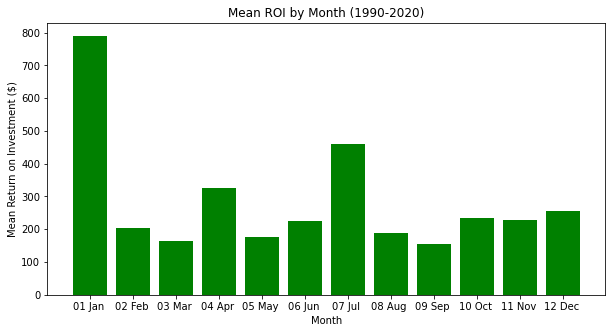

In [32]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = mean_ROI_by_month .index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

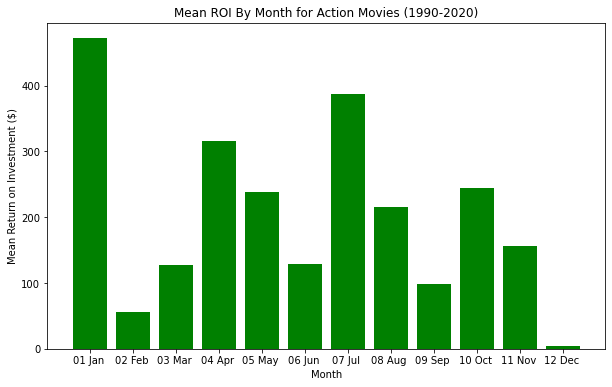

In [26]:
new_gf1_Action_Grouped = new_gf1_Action.groupby(["release_month"], as_index=False).mean()
new_gf1_Action_Grouped = new_gf1_Action_Grouped.set_index("release_month")

height = new_gf1_Action_Grouped['ROI']
x = range(12)
labels = new_gf1_Action_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Action Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

In [38]:
new_gf1_Action["day of the week"]

11         Friday
16         Friday
24         Friday
26         Friday
39         Friday
          ...    
2748       Friday
2769    Wednesday
2805       Friday
2808       Friday
2817       Friday
Name: day of the week, Length: 108, dtype: object

<ipython-input-51-196fe1a130f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Action['converted'] = pd.to_datetime(pd.Series(new_gf1_Action["release_date"]))
<ipython-input-51-196fe1a130f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Action["day of the week"] = new_gf1_Action["converted"].dt.day_name()


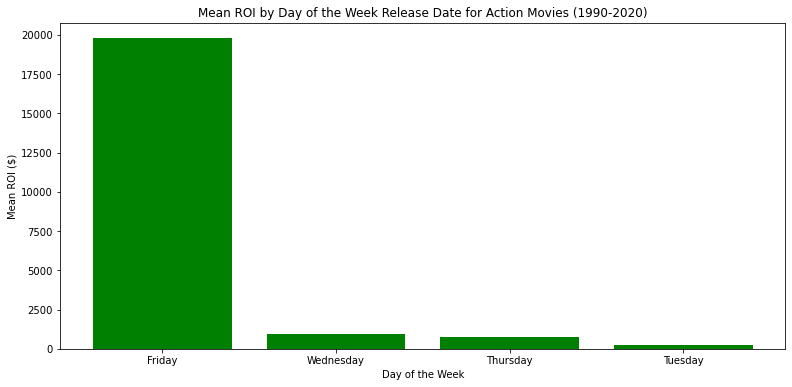

In [51]:
new_gf1_Action['converted'] = pd.to_datetime(pd.Series(new_gf1_Action["release_date"]))
new_gf1_Action["day of the week"] = new_gf1_Action["converted"].dt.day_name()
new_gf1_Action_WeekName = new_gf1_Action.groupby("day of the week").sum()
new_gf1_Action_WeekName = new_gf1_Action_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Action_WeekName['ROI']
x = range(4)
labels = new_gf1_Action_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Action Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

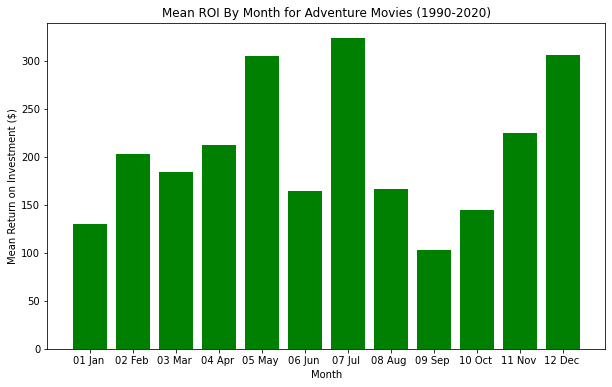

In [27]:
new_gf1_Adventure_Grouped = new_gf1_Adventure.groupby(["release_month"], as_index=False).mean()
new_gf1_Adventure_Grouped = new_gf1_Adventure_Grouped.set_index("release_month")

height = new_gf1_Adventure_Grouped['ROI']
x = range(12)
labels = new_gf1_Adventure_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Adventure Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-50-025352c5a0d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Adventure['converted'] = pd.to_datetime(pd.Series(new_gf1_Adventure["release_date"]))
<ipython-input-50-025352c5a0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Adventure["day of the week"] = new_gf1_Adventure["converted"].dt.day_name()


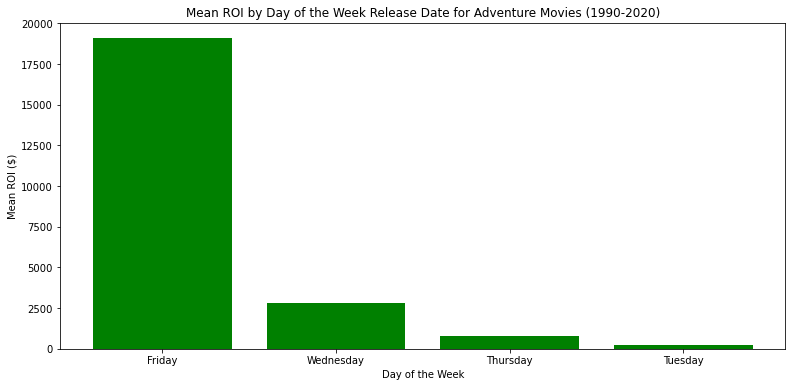

In [50]:
new_gf1_Adventure['converted'] = pd.to_datetime(pd.Series(new_gf1_Adventure["release_date"]))
new_gf1_Adventure["day of the week"] = new_gf1_Adventure["converted"].dt.day_name()
new_gf1_Adventure_WeekName = new_gf1_Adventure.groupby("day of the week").sum()
new_gf1_Adventure_WeekName = new_gf1_Adventure_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Adventure_WeekName['ROI']
x = range(4)
labels = new_gf1_Adventure_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Adventure Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

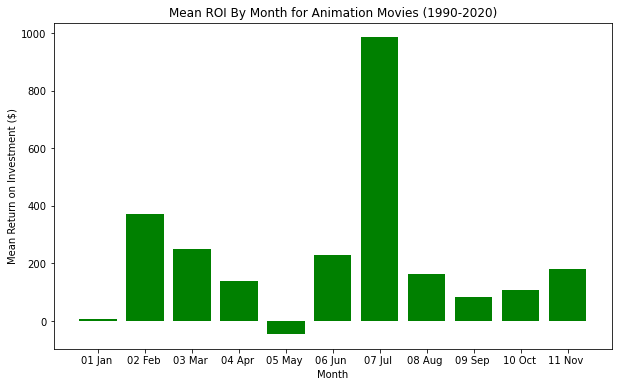

In [28]:
new_gf1_Animation_Grouped = new_gf1_Animation.groupby(["release_month"], as_index=False).mean()
new_gf1_Animation_Grouped = new_gf1_Animation_Grouped.set_index("release_month")

height = new_gf1_Animation_Grouped['ROI']
x = range(11)
labels = new_gf1_Animation_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Animation Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-57-adefb5913154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Animation['converted'] = pd.to_datetime(pd.Series(new_gf1_Animation["release_date"]))
<ipython-input-57-adefb5913154>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Animation["day of the week"] = new_gf1_Animation["converted"].dt.day_name()


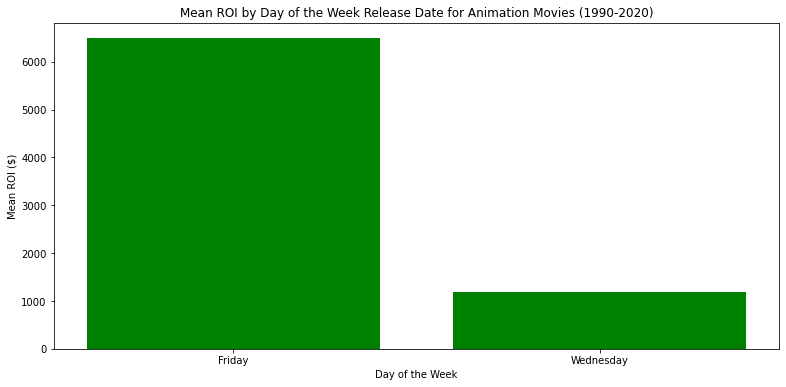

In [57]:
new_gf1_Animation['converted'] = pd.to_datetime(pd.Series(new_gf1_Animation["release_date"]))
new_gf1_Animation["day of the week"] = new_gf1_Animation["converted"].dt.day_name()
new_gf1_Animation_WeekName = new_gf1_Animation.groupby("day of the week").sum()
new_gf1_Animation_WeekName = new_gf1_Animation_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Animation_WeekName['ROI']
x = range(2)
labels = new_gf1_Animation_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Animation Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

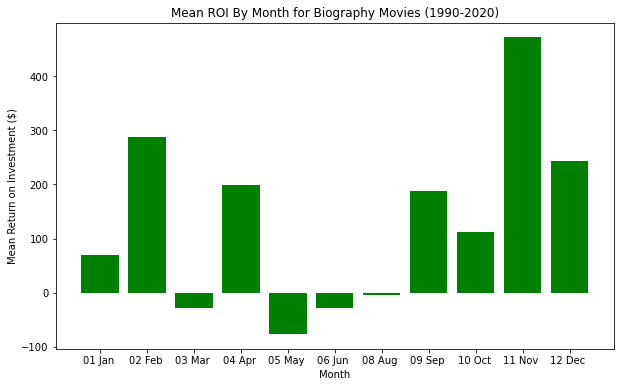

In [55]:
new_gf1_Biography_Grouped = new_gf1_Biography.groupby(["release_month"], as_index=False).mean()
new_gf1_Biography_Grouped = new_gf1_Biography_Grouped.set_index("release_month")

height = new_gf1_Biography_Grouped['ROI']
x = range(11)
labels = new_gf1_Biography_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Biography Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-58-e4346fde1d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Biography['converted'] = pd.to_datetime(pd.Series(new_gf1_Biography["release_date"]))
<ipython-input-58-e4346fde1d1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Biography["day of the week"] = new_gf1_Biography["converted"].dt.day_name()


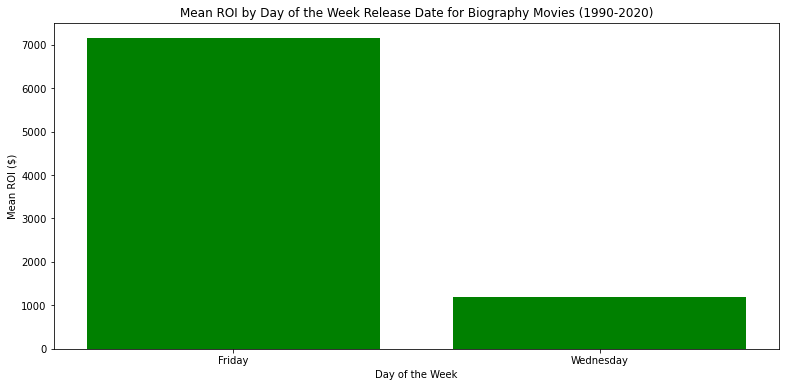

In [58]:
new_gf1_Biography['converted'] = pd.to_datetime(pd.Series(new_gf1_Biography["release_date"]))
new_gf1_Biography["day of the week"] = new_gf1_Biography["converted"].dt.day_name()
new_gf1_Biography_WeekName = new_gf1_Biography.groupby("day of the week").sum()
new_gf1_Biography_WeekName = new_gf1_Biography_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Biography_WeekName['ROI']
x = range(2)
labels = new_gf1_Biography_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Biography Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

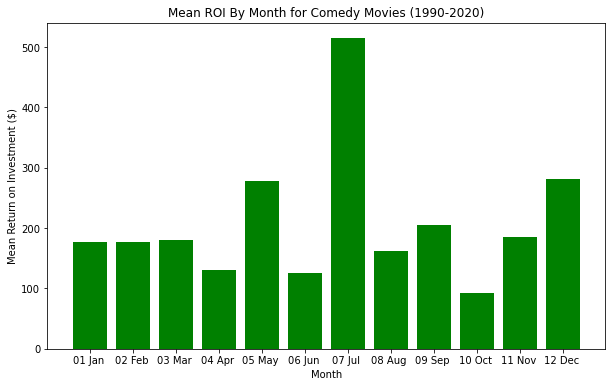

In [30]:
new_gf1_Comedy_Grouped = new_gf1_Comedy.groupby(["release_month"], as_index=False).mean()
new_gf1_Comedy_Grouped = new_gf1_Comedy_Grouped.set_index("release_month")

height = new_gf1_Comedy_Grouped['ROI']
x = range(12)
labels = new_gf1_Comedy_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Comedy Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-62-a0ed83cfb98d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Comedy['converted'] = pd.to_datetime(pd.Series(new_gf1_Comedy["release_date"]))
<ipython-input-62-a0ed83cfb98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Comedy["day of the week"] = new_gf1_Comedy["converted"].dt.day_name()


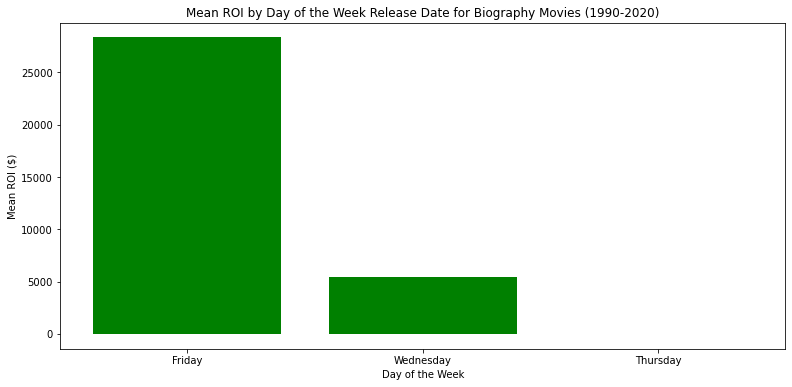

In [62]:
new_gf1_Comedy['converted'] = pd.to_datetime(pd.Series(new_gf1_Comedy["release_date"]))
new_gf1_Comedy["day of the week"] = new_gf1_Comedy["converted"].dt.day_name()
new_gf1_Comedy_WeekName = new_gf1_Comedy.groupby("day of the week").sum()
new_gf1_Comedy_WeekName = new_gf1_Comedy_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Comedy_WeekName['ROI']
x = range(3)
labels = new_gf1_Comedy_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Biography Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

# old codes--ignore

In [31]:
data1['production_budget'] = [row.replace('$','') for row in data1['production_budget']]
data1['production_budget'] = [row.replace(',','') for row in data1['production_budget']]

data1['domestic_gross'] = [row.replace('$','') for row in data1['domestic_gross']]
data1['domestic_gross'] = [row.replace(',','') for row in data1['domestic_gross']]

data1['worldwide_gross'] = [row.replace('$','') for row in data1['worldwide_gross']]
data1['worldwide_gross'] = [row.replace(',','') for row in data1['worldwide_gross']]




data1['domestic_gross'] = [int(row) for row in data1['domestic_gross']]
data1['production_budget'] = [int(row) for row in data1['production_budget']]
data1['worldwide_gross'] = [int(row) for row in data1['worldwide_gross']]

data1['revenue'] = data1['domestic_gross']- data1['production_budget']

NameError: name 'data1' is not defined

In [ ]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
data1["release_month"] = data1["release_month"].str.replace("Jan", "01 Jan")
data1["release_month"] = data1["release_month"].str.replace("Feb", "02 Feb")
data1["release_month"] = data1["release_month"].str.replace("Mar", "03 Mar")
data1["release_month"] = data1["release_month"].str.replace("Apr", "04 Apr")
data1["release_month"] = data1["release_month"].str.replace("May", "05 May")
data1["release_month"] = data1["release_month"].str.replace("Jun", "06 Jun")
data1["release_month"] = data1["release_month"].str.replace("Jul", "07 Jul")
data1["release_month"] = data1["release_month"].str.replace("Aug", "08 Aug")
data1["release_month"] = data1["release_month"].str.replace("Sep", "09 Sep")
data1["release_month"] = data1["release_month"].str.replace("Oct", "10 Oct")
data1["release_month"] = data1["release_month"].str.replace("Nov", "11 Nov")
data1["release_month"] = data1["release_month"].str.replace("Dec", "12 Dec")
data1.shape

In [ ]:
data1 = data1[data1.worldwide_gross != 0]
data1.shape

In [ ]:
#data1 = data1[data1.domestic_gross != 0]
#data1.shape

In [ ]:
#data1 = data1[data1.production_budget != 0]
#data1.shape

In [ ]:
data1 = data1[data1.release_year != 2020]
data1
#data1["release_year"].unique()

In [ ]:
#group the dataset by month for the entire dataset
grouped_by_month = data1.groupby(["release_month"]).sum()
grouped_by_month

In [ ]:
grouped_by_year = data1.groupby(["release_year"]).sum()
grouped_by_year.shape

In [ ]:
height = grouped_by_year['revenue']
x = range(159)
labels = grouped_by_year.index

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Year (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Year");

In [ ]:
#an overview of revenue by month from 1915-2020

height = grouped_by_month['revenue']
x = range(12)
labels = grouped_by_month.index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2019 = data1[data1["release_year"] == "2019"]
data1_2019 = data1_2019.drop("id", axis=1)
data1_2019 = data1_2019.groupby("release_month").sum()
data1_2019.shape
#data1_2019["release_month"].unique()
#data1_2019.set_index("release_month")
#data1_2019.groupby("release_month").sum()

In [ ]:
height = data1_2019['revenue']
x = range(5)
labels = data1_2019.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2019)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2018 = data1[data1["release_year"] == "2018"]
data1_2018 = data1_2018.drop("id", axis=1)
data1_2018 = data1_2018.groupby("release_month").sum()
data1_2018
#data1_2018["release_month"].unique()
#data1_2018.set_index("release_month")
#data1_2018.groupby("release_month").sum()

In [ ]:
height = data1_2018['revenue']
x = range(12)
labels = data1_2018.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2018)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2017 = data1[data1["release_year"] == "2017"]
data1_2017 = data1_2017.drop("id", axis=1)
data1_2017 = data1_2017.groupby("release_month").sum()
data1_2017
#data1_2017["release_month"].unique()
#data1_2017.set_index("release_month")
#data1_2017.groupby("release_month").sum()

In [ ]:
height = data1_2017['revenue']
x = range(12)
labels = data1_2017.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2017)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
for x in data1["release_month"]:
    if x == "Dec":
        data1["release_month_new"] == "12 Dec"

In [ ]:
for x in data1["release_month_new"]:
    if x == "Jan":
        data1["release_month_new"][x] == "01 Jan"
    elif x == "Feb":
        return "02 Feb"
    elif x == "Mar":
        return "03 Mar"
    elif x == "Apr":
        return "04 Apr"
    elif x == "May":
        return "05 May"
    elif x == "Jun":
        return "06 Jun"
    elif x == "Jul":
        return "07 Jul"
    elif x == "Aug":
        return "08 Aug"
    elif x == "Sep":
        return "09 Sep"
    elif x == "Oct":
        return "10 Oct"
    elif x == "Nov":
        return "11 Nov"
    elif x == "Dec":
        return "12 Dec"